> Please go through this <a href="https://medium.com/towards-artificial-intelligence/nothing-but-numpy-understanding-creating-neural-networks-with-computational-graphs-from-scratch-6299901091b0">brilliant artical</a> before using this jupyter notebook
<br>


## [1] Basic Neural network

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.astnode_interactivity = 'all'

In [2]:
from helper import *

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

<img src="images/img_01_nn.png">

In [5]:
#https://medium.com/towards-artificial-intelligence/nothing-but-numpy-understanding-creating-neural-networks-with-computational-graphs-from-scratch-6299901091b0

In [6]:
data = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
data

array([[0, 0, 0],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

In [7]:
"""
weights: Contains weight whose value neural network would learn.
"""
weights = np.array([0.1, 0.6])

print(weights.shape)
weights

(2,)


array([0.1, 0.6])

In [8]:
"""
Initially set bias to Zero
"""
bias = 0

In [9]:
"""
Just extracting input features from data points
"""
X_O = data[:, :2]
print(X_O.shape)
X_O

(4, 2)


array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [10]:
"""
As we need to perform dot product in next step, therefore to define valid dimesions
we have to take transpose of X_O
"""
X = X_O.T
print(X.shape)
X

(2, 4)


array([[0, 0, 1, 1],
       [0, 1, 0, 1]])

In [11]:
"""
Extracting output values corresponding to input features
"""
Y =  data[:, -1]
Y

array([0, 1, 1, 1])

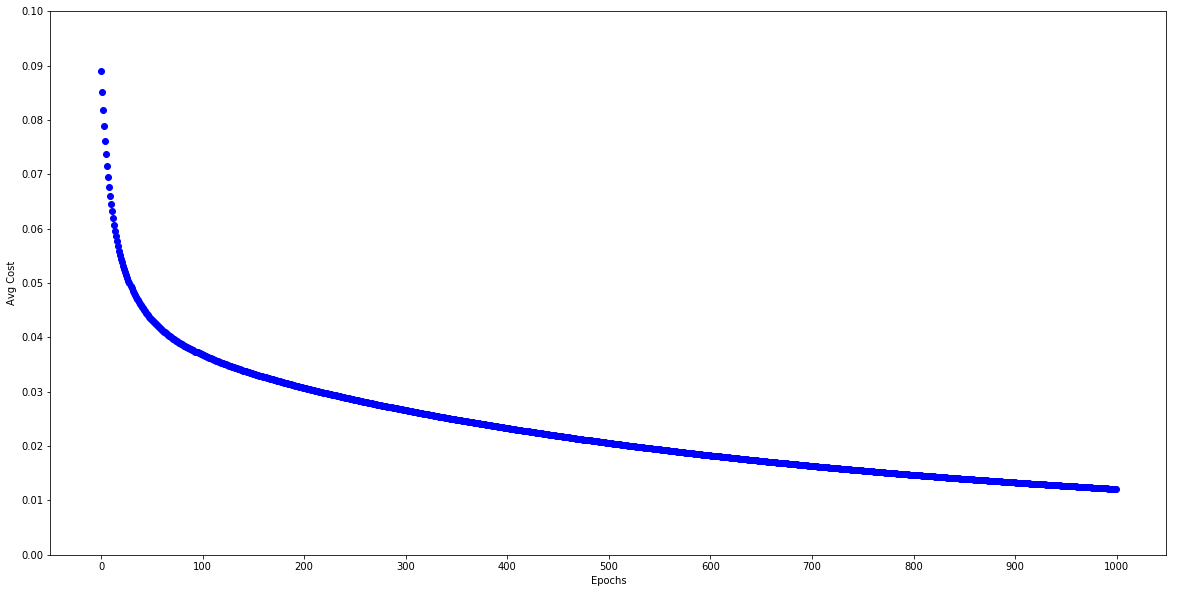

In [14]:
weights = np.array([0.1, 0.6])
bias = 0

cost = list()
epochs = 1000

fig = plt.figure(figsize = (20, 10))

for epoch in range(epochs):

    """
    FORWARD PROPAGATION
    --------------------
    """

    Z = compute_linear_eqn(X, weights, bias)

    y_hat = compute_sigmoid(Z)

    avg_cost = compute_cost(Y, y_hat, len(y_hat))
    cost.append(avg_cost)


    """
    BACKWARD PROPAGATION
    --------------------

    local__del_cost__by__del_y_hat : ($cost/$y_hat)

    local__del_y_hat__by__del_z    : ($y_hat/$z)

    final__del_cost__by__del_z     : ($y_hat/$z) * ($cost / $y_hat)

    local__del_z__by__del_w        : ($z/$w)

    local__del_z__by__del_bias     : ($z/$b)

    """
    local__del_cost__by__del_y_hat = compute__del_cost__by__del_y_hat(Y, y_hat, len(y_hat))

    local__del_y_hat__by__del_z = compute__del_y_hat__by__del_z(y_hat)

    final__del_cost__by__del_z = final_grad_at__z(local__del_cost__by__del_y_hat, local__del_y_hat__by__del_z)

    local__del_z__by__del_w = compute__del_z__by__del_w(X_O)

    local__del_z__by__del_bias = compute__del_z__by__del_b()


    """
    UPDATE WEIGHTS
    --------------
    """

    final__del_cost__by__del_w = np.dot(final__del_cost__by__del_z, local__del_z__by__del_w)

    """
    lr: Learning rate
    """
    lr = 0.05

    lr__mul__weights = np.multiply(final__del_cost__by__del_w, 1)

    weights = np.subtract(weights, lr__mul__weights)

    """
    UPDATE BIAS
    -----------

    final__del_cost__by__del_bias ($cost/$b)
    $cost/$b: Change in cost function w.r.t bias
    """

    final__del_cost__by__del_bias = np.sum(np.multiply( final__del_cost__by__del_z, local__del_z__by__del_bias))

    bias = bias - np.multiply(lr, final__del_cost__by__del_bias)
    
    plt.plot(epoch, avg_cost, 'bo')


plt.xticks(np.arange(0, epochs+1, 100))
plt.yticks(np.arange(0, 0.11, 0.01))
plt.xlabel('Epochs')
plt.ylabel('Avg Cost')
plt.show()

print("\n")

In [13]:
print(cost[:5])
cost[-5:]

[0.08891294752305501, 0.08515385015384738, 0.08180156499682735, 0.07880385176971907, 0.07611473607425068]


[0.012161830474319998,
 0.012150631825789663,
 0.012139449736866446,
 0.012128284176581839,
 0.012117135114031898]